In [1]:
from fastai2.vision.all import *
from animal_sounds import *

In [2]:
source = sounds_source()

In [3]:
dblock = DataBlock((ImageBlock(PILImageBW), CategoryBlock), get_items=get_files,
                    get_x=get_spec, get_y=parent_label,
                    splitter=RandomSplitter(seed=42))

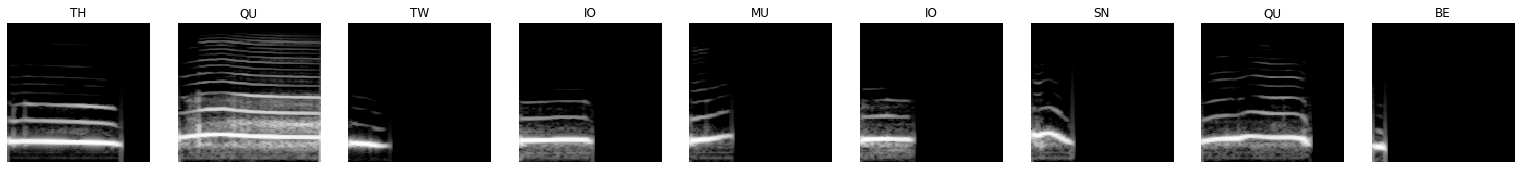

In [4]:
dls = dblock.dataloaders(source, bs=64)
dls.show_batch(nrows=1)

In [5]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [6]:
learn.load_encoder('duration-encoder')

In [7]:
learn.fine_tune(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.047254,0.438147,0.866850,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.180993,0.090024,0.972546,00:13


### 1-1
| model | acc | ptrain | BW | ptrain-dur |
| ----- | --- | ------ | -- | ---------- |
| resnet18 | 0.975 | yes | yes | no |
| resnet18 | 0.978 | yes | yes | yes |